In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time

In [3]:
class Dice:
    def __init__(self, dice):
        self.sides_count = np.size(dice, axis = 0)
        self.dice = dice
        
    def return_sides_count(self):
        return self.sides_count
        
    def return_values_on_one_side(self, i):
        return self.dice[i]
        
    def return_dice(self):
        return self.dice
    
    def roll_dice(self):
        return np.random.choice(self.dice)
        
    def results_of_rolls(self, amount):
        rolled = np.random.choice(self.dice, amount)
        return Counter(np.concatenate(rolled))
            
    def chances_for(self, dice_amount, expected_amount, MC_repeat=100000):
        rolled = np.random.choice(self.dice, (MC_repeat, dice_amount))
        items_of_rolls = [Counter(np.concatenate(row)) for row in rolled]
        
        keys = [np.array(list(counter.keys())) for counter in items_of_rolls ]
        values = [np.array(list(counter.values())) for counter in items_of_rolls ]

        unique_values = set(np.concatenate(self.dice))
        dict_meet_expected_amount = {key: 0 for key in unique_values}
        
        for i in range(MC_repeat):
            check_if_true = np.where(values[i] >= expected_amount)[0]

            for idx in check_if_true:
                key = keys[i][idx] 
                dict_meet_expected_amount[key] += 1 
                
        dict_meet_expected_amount = {key: np.round(value / MC_repeat*100, 2) for key, value in dict_meet_expected_amount.items()}
        
        return dict_meet_expected_amount
        
    def plot_results(self, results):
        sorted_rolls = sorted(results.items(), key=lambda x: x[1], reverse=True)
        keys, values = zip(*sorted_rolls)
        
        fig, ax = plt.subplots(figsize=(4, 6))
        bars = ax.bar(keys, values, color='blueviolet')
        ax.set_xlabel("Category")
        ax.set_ylabel("Count")
        ax.bar_label(bars, padding=3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

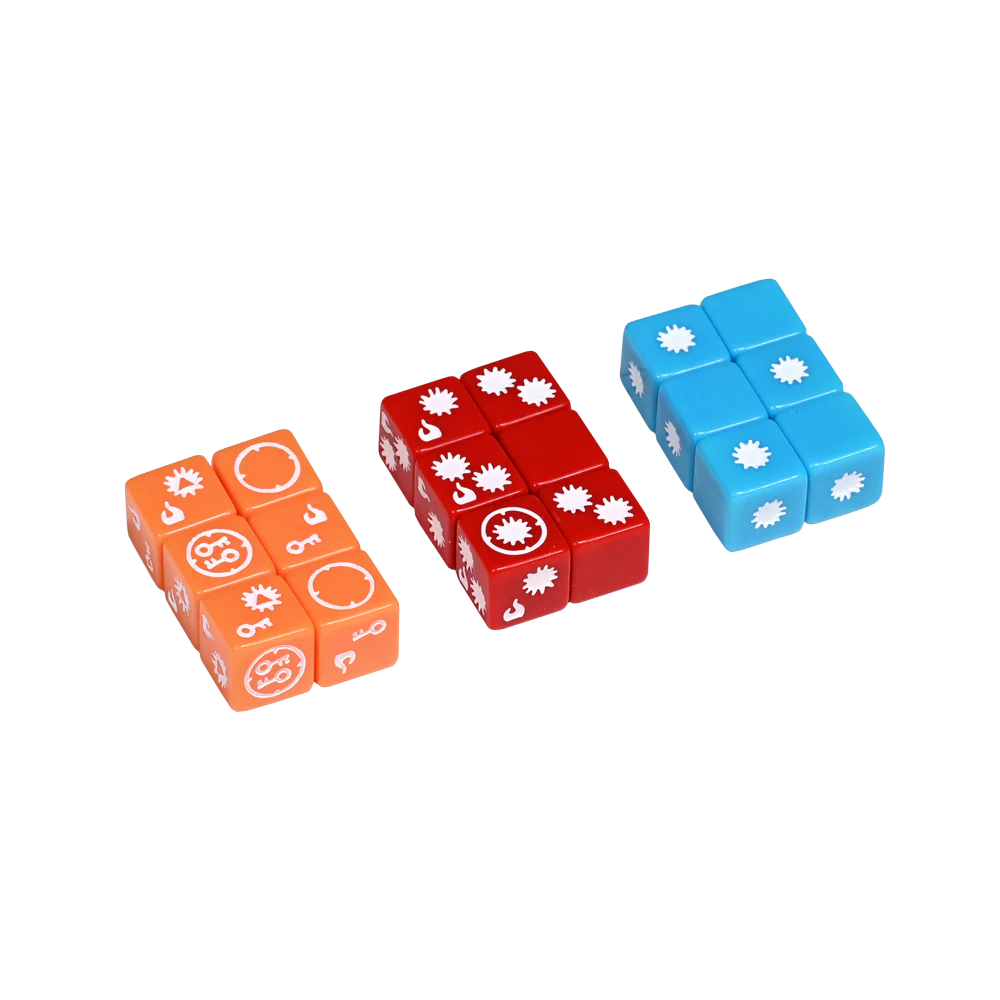

In [4]:
raid_values = np.array([["intercept"],
               ["intercept"],
               ["key", "self hit"],
               ["bulding hit", "key"],
               ["intercept", "key", "key"],
               ["self hit", "bulding hit"]], dtype=object)

skirmish_values = np.empty((6,), object)
skirmish_values[0:3] = [["hit"]]
skirmish_values[3:6] = [["nothing"]]

assault_values = np.array([["hit", "hit"],
                   ["hit", "self hit"],
                   ["nothing"],
                   ["hit", "hit", "self hit"],
                   ["hit", "hit"],
                   ["intercept", "hit"]], dtype=object)

raid_dice = Dice(raid_values)
skirmish_dice = Dice(skirmish_values)
assault_dice = Dice(assault_values)

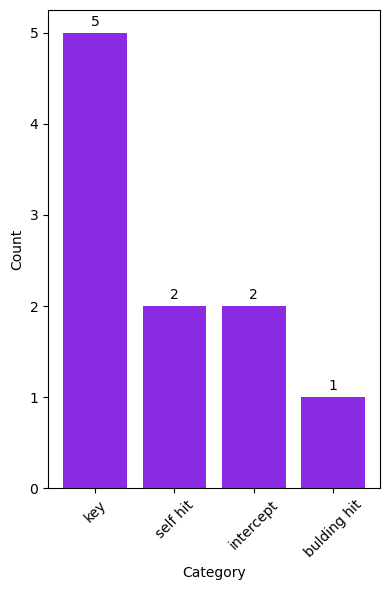

In [42]:
results = raid_dice.results_of_rolls(4)
raid_dice.plot_results(results)

Time taken: 2.99372 seconds


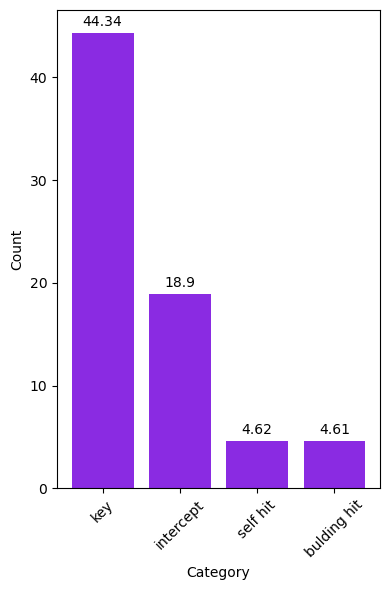

{'intercept': 18.9, 'key': 44.34, 'bulding hit': 4.61, 'self hit': 4.62}


In [7]:
start_time = time.time()
result = raid_dice.chances_for(5, 4)
end_time = time.time()

time_taken = end_time - start_time
print(f"Time taken: {time_taken:.5f} seconds")
raid_dice.plot_results(result)
print(result)

In [45]:
start_time = time.time()
result = skirmish_dice.chances_for(6, 4)
end_time = time.time()

time_taken = end_time - start_time
print(f"Time taken: {time_taken:.5f} seconds")
print(result)

Time taken: 2.70073 seconds
{'nothing': 34.78, 'hit': 34.33}


In [46]:
start_time = time.time()
result = assault_dice.chances_for(3, 3)
end_time = time.time()

time_taken = end_time - start_time
print(f"Time taken: {time_taken:.5f} seconds")
print(result)

Time taken: 2.55933 seconds
{'nothing': 0.49, 'intercept': 0.45, 'hit': 86.89, 'self hit': 3.74}


# Checking the code for old dices beacuse all online calulators are for old ones

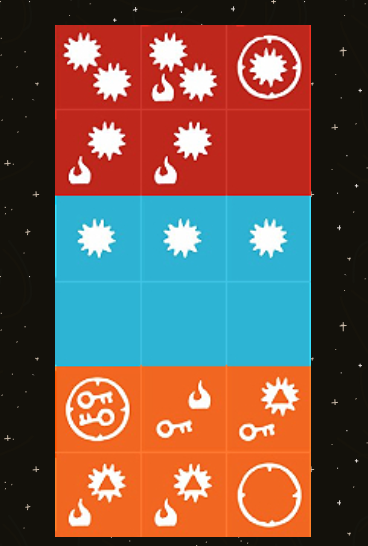

Website for checking correctness of code: https://arcs-dice.matthewkelly.ca/ <br>
Old dices from: https://arcs-dice-roller.vercel.app/

In [47]:
raid_values_old = np.array([["intercept", "key", "key"],
                   ["key", "self hit"],
                   ["bulding hit", "key"],
                   ["self hit", "bulding hit"],
                   ["self hit", "bulding hit"],
                   ["intercept"]], dtype=object)


assault_values_old = np.array([["hit", "hit"],
                   ["hit", "hit", "self hit"],
                   ["intercept", "hit"],
                   ["hit", "self hit"],
                   ["hit", "self hit"],
                   ["nothing"]], dtype=object)

raid_dice_old = Dice(raid_values_old)
assault_dice_old = Dice(assault_values_old)

In [48]:
result = raid_dice_old.chances_for(4, 3)
print(result)

{'intercept': 10.98, 'bulding hit': 31.19, 'self hit': 31.29, 'key': 52.2}


In [49]:
result = assault_dice_old.chances_for(5, 3)
print(result)

{'intercept': 3.53, 'hit': 98.51, 'nothing': 3.55, 'self hit': 50.17}
